In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [13]:
np.asarray(20).repeat(30)

array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20])

In [11]:
import pandas.util.testing as tm; tm.N=3

def unpivot(frame):    
    N, K = frame.shape
    
    print(N,K)
    data = {'value':frame.values.ravel('F'),
            'variable': np.asarray(frame.columns).repeat(N),
            'date': np.tile(np.asarray(frame.index), K)}
    return DataFrame(data,columns = ['date','variable','value'])

In [12]:
dframe = unpivot(tm.makeTimeDataFrame())

30 4


In [15]:
dframe

,date,variable,value
0,2000-01-03,A,-0.736429
1,2000-01-04,A,0.072835
2,2000-01-05,A,-1.751320
3,2000-01-06,A,-0.469537
4,2000-01-07,A,-0.960741
...,...,...,...
115,2000-02-07,D,-0.180010
116,2000-02-08,D,0.782225
117,2000-02-09,D,-0.163236
118,2000-02-10,D,-1.526746


In [17]:
dframe_piv = dframe.pivot('date','variable','value')

/tmp/ipykernel_9225/1119636861.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  dframe_piv = dframe.pivot('date','variable','value')


In [18]:
dframe_piv

variable,A,B,C,D
date,,,,
2000-01-03,-0.736429,1.847996,-0.522051,0.318204
2000-01-04,0.072835,-0.494447,0.613630,-0.902673
2000-01-05,-1.751320,0.337630,0.416648,1.528922
2000-01-06,-0.469537,-0.200946,-0.745623,-1.186042
2000-01-07,-0.960741,-1.031567,-0.504662,-1.796484
2000-01-10,-2.228277,0.371409,0.851575,1.570687
2000-01-11,-1.063503,-0.372814,-0.006725,1.252701
2000-01-12,0.605032,0.734543,-3.513121,0.389707
2000-01-13,-0.429194,-0.376495,0.513095,-1.905937


In [26]:
df = DataFrame({'k1':['A']*2+['B']*3, 'k2':[1]*3+[2]*2})

In [27]:
df.head()

,k1,k2
0,A,1
1,A,1
2,B,1
3,B,2
4,B,2


In [28]:
df.duplicated()

0    False
1     True
2    False
3    False
4     True
dtype: bool

In [29]:
df.drop_duplicates()

,k1,k2
0,A,1
2,B,1
3,B,2


In [30]:
df.drop_duplicates('k1')

,k1,k2
0,A,1
2,B,1


In [33]:
df = DataFrame({'cidade':['Teresina','Recife','João Pessoa']})

In [36]:
df['Estado'] = df['cidade'].map({'Teresina':'Piaui','Recife':'Pernambuco','João Pessoa':'Paraiba'})

In [37]:
df

,cidade,Estado
0,Teresina,Piaui
1,Recife,Pernambuco
2,João Pessoa,Paraiba


In [38]:
df = DataFrame({'k1':['A']*2+['B']*3, 'k2':[1]*3+[2]*2})

In [39]:
df

,k1,k2
0,A,1
1,A,1
2,B,1
3,B,2
4,B,2


In [40]:
df.replace({'A':'D'})

,k1,k2
0,D,1
1,D,1
2,B,1
3,B,2
4,B,2


# Binning

In [1]:
import pandas as pd

In [4]:
years = list(range(1920,2022,1))

In [5]:
decades = list(range(1900,2030,10))

In [11]:
decade_cat = pd.cut(years,decades)

In [13]:
decade_cat.categories

IntervalIndex([(1900, 1910], (1910, 1920], (1920, 1930], (1930, 1940], (1940, 1950] ... (1970, 1980], (1980, 1990], (1990, 2000], (2000, 2010], (2010, 2020]], dtype='interval[int64, right]')

In [14]:
pd.value_counts(decade_cat)

(1920, 1930]    10
(1930, 1940]    10
(1940, 1950]    10
(1950, 1960]    10
(1960, 1970]    10
(1970, 1980]    10
(1980, 1990]    10
(1990, 2000]    10
(2000, 2010]    10
(2010, 2020]    10
(1910, 1920]     1
(1900, 1910]     0
dtype: int64

# groupby

In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.DataFrame({'key1':range(100),
                    'key2':np.random.randn(100)})

In [11]:
for row in df['key2'].groupby(['A']*50+['B']*50).mean():
    print(row)

0.2698873824374981
-0.12963429812209973


In [13]:
for (k1,k2),group in df.groupby(['key1','key2']):
    print("group=",group)
    print(k1,k2)

group=    key1      key2
0     0 -0.332253
0 -0.332253350123058
group=    key1    key2
1     1  0.6321
1 0.6321002846763423
group=    key1      key2
2     2 -0.014427
2 -0.014426983323648956
group=    key1     key2
3     3  2.57766
3 2.57765958411754
group=    key1      key2
4     4  1.150624
4 1.1506238298144156
group=    key1      key2
5     5 -0.396463
5 -0.39646280153211083
group=    key1      key2
6     6  0.273995
6 0.27399530089905333
group=    key1      key2
7     7  1.674496
7 1.6744957873868473
group=    key1      key2
8     8  0.681093
8 0.6810927621983295
group=    key1      key2
9     9 -2.181644
9 -2.1816437777298963
group=     key1      key2
10    10  0.168064
10 0.1680638742301315
group=     key1      key2
11    11  0.781097
11 0.7810969316853293
group=     key1     key2
12    12  0.92817
12 0.9281699639885853
group=     key1      key2
13    13  1.374251
13 1.3742509420284688
group=     key1     key2
14    14  0.13535
14 0.1353498250483885
group=     key1      key2
15  

# groupby with dicts

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.DataFrame(np.arange(16).reshape(4,4),index=['Dog','Cat','Bird','Mouse'],columns=['W','X','Y','Z'])

In [5]:
df

,W,X,Y,Z
Dog,0,1,2,3
Cat,4,5,6,7
Bird,8,9,10,11
Mouse,12,13,14,15


In [7]:
df.groupby({"W":"good","X":"bad","Y":"good","Z":"bad"},axis=1).sum()

,bad,good
Dog,4,2
Cat,12,10
Bird,20,18
Mouse,28,26


In [8]:
df.groupby(["good","bad","good","bad"],axis=1).sum()

,bad,good
Dog,4,2
Cat,12,10
Bird,20,18
Mouse,28,26


# Aggregetion

In [31]:
df = pd.read_csv("winequality-red.csv",sep=';')

In [32]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
wino = df.groupby('quality')

In [34]:
wino.describe()

fixed acidity                                                     \
                count      mean       std  min   25%   50%     75%   max   
quality                                                                    
3                10.0  8.360000  1.770875  6.7  7.15  7.50   9.875  11.6   
4                53.0  7.779245  1.626624  4.6  6.80  7.50   8.400  12.5   
5               681.0  8.167254  1.563988  5.0  7.10  7.80   8.900  15.9   
6               638.0  8.347179  1.797849  4.7  7.00  7.90   9.400  14.3   
7               199.0  8.872362  1.992483  4.9  7.40  8.80  10.100  15.6   
8                18.0  8.566667  2.119656  5.0  7.25  8.25  10.225  12.6   

        volatile acidity            ... sulphates       alcohol             \
                   count      mean  ...       75%   max   count       mean   
quality                             ...                                      
3                   10.0  0.884500  ...     0.615  0.86    10.0   9.955000   
4                   53.0  0.693962  ...     0.600  2.00    53.0  10.265094   
5                  681.0  0.577041  ...     0.660  1.98   681.0   9.899706   
6                  638.0  0.497484  ...     0.750  1.95   638.0  10.629519   
7                  199.0  0.403920  ...     0.830  1.36   199.0  11.465913   
8                   18.0  0.423333  ...     0.820  1.10    18.0  12.094444   

                                                      
              std  min     25%     50%     75%   max  
quality                                               
3        0.818009  8.4   9.725   9.925  10.575  11.0  
4        0.934776  9.0   9.600  10.000  11.000  13.1  
5        0.736521  8.5   9.400   9.700  10.200  14.9  
6        1.049639  8.4   9.800  10.500  11.300  14.0  
7        0.961933  9.2  10.800  11.500  12.100  14.0  
8        1.224011  9.8  11.325  12.150  12.875  14.0  

[6 rows x 88 columns]

In [35]:
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [36]:
wino.agg('std')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,1.770875,0.331256,0.250664,1.401596,0.066241,9.763879,16.828877,0.002002,0.144052,0.122020,0.818009
4,1.626624,0.220110,0.201030,1.789436,0.076192,9.025926,27.583374,0.001575,0.181441,0.239391,0.934776
5,1.563988,0.164801,0.180003,1.359753,0.053707,10.955446,36.993116,0.001589,0.150618,0.171062,0.736521
6,1.797849,0.160962,0.195108,1.441576,0.039563,9.940911,25.038250,0.002000,0.153995,0.158650,1.049639
7,1.992483,0.145224,0.194432,1.371509,0.029456,10.175255,33.191206,0.002176,0.150101,0.135639,0.961933
8,2.119656,0.144914,0.199526,1.295038,0.011678,11.155613,25.433240,0.002378,0.200640,0.115379,1.224011


In [37]:
import matplotlib.pyplot as plt

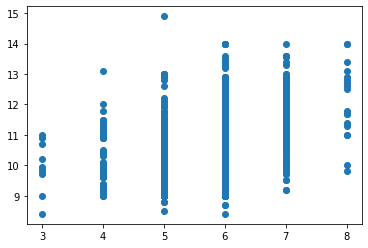

In [38]:
plt.scatter(x=df['quality'],y=df['alcohol'])

In [41]:
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [ ]:
df.pivot()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f810891c820>,
 'caps': [<matplotlib.lines.Line2D at 0x7f810891cd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f810891c580>,
 'medians': [<matplotlib.lines.Line2D at 0x7f810892c2e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f810892c580>,
 'means': []}

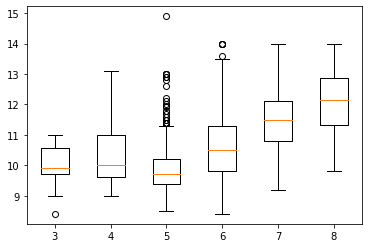

In [53]:
labels,dfs = zip(*df.groupby('quality'))
xs = [df_aux['alcohol'] for df_aux in dfs]
plt.boxplot(xs,labels=labels)